In [1]:
import pandas as pd
import numpy as np
import datetime
# from datetime import datetime
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from sklearn.manifold import MDS
# from sklearn.preprocessing import Imputer
# from sklearn.cluster import KMeans
import math

In [2]:
# # minutes = input("Enter minutes intervel = ")
# fromDate = input("Enter From Date = ")
# toDate = input("Enter to Date = ")

# fromDate = datetime.strptime(fromDate, "%d/%m/%Y")
# toDate = datetime.strptime(toDate, "%d/%m/%Y")
# print(fromDate.year)
# if fromDate > toDate:
#     print("From date greater than to Date")

In [3]:
#Data preprocessing
PowerConsumptionData = pd.read_csv('household_power_consumption.txt', sep=";", header=0)
PowerConsumptionData['Date'] = pd.to_datetime(PowerConsumptionData["Date"],format="%d/%m/%Y")
PowerConsumptionData['Time'] = pd.to_datetime(PowerConsumptionData["Time"],format="%H:%M:%S")

PowerConsumptionData.drop(PowerConsumptionData[PowerConsumptionData['Global_active_power'] == "?"].index, inplace = True)
PowerConsumptionData["Global_active_power"] = PowerConsumptionData[["Global_active_power"]].apply(pd.to_numeric)

PowerConsumptionData.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# newData = PowerConsumptionData[(PowerConsumptionData["Date"].dt.year==fromDate.year) & (PowerConsumptionData["Time"].dt.minute%minutes==0)][["Date","Time","Global_active_power"]]
newData = PowerConsumptionData[(PowerConsumptionData["Date"].dt.year==2007) & (PowerConsumptionData["Time"].dt.minute%30==0)][["Date","Time","Global_active_power"]]
newData.head()

,Date,Time,Global_active_power
21996,2007-01-01,1900-01-01 00:00:00,2.580
22026,2007-01-01,1900-01-01 00:30:00,2.648
22056,2007-01-01,1900-01-01 01:00:00,2.466
22086,2007-01-01,1900-01-01 01:30:00,2.448
22116,2007-01-01,1900-01-01 02:00:00,2.504


In [5]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2007, 12, 31)

# m = int(minutes)/60
# index = pd.date_range(start = fromDate, end = toDate, freq = str(m)+"H")

index = pd.date_range(start, end, freq = "0.5H")
df = pd.DataFrame(index, columns = ["Date"])
list_of_Data = list(zip(df["Date"].dt.date, df["Date"].dt.time))
df2 = pd.DataFrame(list_of_Data, columns = ["Date", "Time"])
df2

newData["Date"] = newData["Date"].astype(str)
newData["Time"] = newData["Time"].astype(str)
newData["Time"] = newData["Time"].str.replace("1900-01-01 ", "")

df2["Time"] = df2["Time"].astype(str)
df2["Date"] = df2["Date"].astype(str)

new_df = pd.merge(df2, newData,  how='left', left_on=['Date','Time'], right_on = ['Date','Time'])
new_df

,Date,Time,Global_active_power
0,2007-01-01,00:00:00,2.580
1,2007-01-01,00:30:00,2.648
2,2007-01-01,01:00:00,2.466
3,2007-01-01,01:30:00,2.448
4,2007-01-01,02:00:00,2.504
...,...,...,...
17468,2007-12-30,22:00:00,2.552
17469,2007-12-30,22:30:00,4.326
17470,2007-12-30,23:00:00,2.154
17471,2007-12-30,23:30:00,0.640


In [6]:
new_df['Date'] = pd.to_datetime(new_df["Date"],format="%Y-%m-%d")
new_df['Time'] = pd.to_datetime(new_df["Time"],format="%H:%M:%S")
# new_df["Global_active_power"].fillna(new_df["Global_active_power"].mean(), inplace = True)
new_df.head()
# new_df[(new_df["Date"].dt.month==8) & (new_df["Date"].dt.year==2007) & (new_df["Date"].dt.day==1) & (new_df["Time"].dt.minute%30==0)]

,Date,Time,Global_active_power
0,2007-01-01,1900-01-01 00:00:00,2.580
1,2007-01-01,1900-01-01 00:30:00,2.648
2,2007-01-01,1900-01-01 01:00:00,2.466
3,2007-01-01,1900-01-01 01:30:00,2.448
4,2007-01-01,1900-01-01 02:00:00,2.504


In [7]:
#linear interpolation
new_df["Global_active_power"] = new_df["Global_active_power"].interpolate(method='linear')
new_df.head()

,Date,Time,Global_active_power
0,2007-01-01,1900-01-01 00:00:00,2.580
1,2007-01-01,1900-01-01 00:30:00,2.648
2,2007-01-01,1900-01-01 01:00:00,2.466
3,2007-01-01,1900-01-01 01:30:00,2.448
4,2007-01-01,1900-01-01 02:00:00,2.504


In [8]:
nanValues=pd.isnull(new_df["Global_active_power"]) 
new_df[nanValues]

,Date,Time,Global_active_power


In [9]:
group1 = new_df.groupby("Date")
group2 = new_df.groupby("Date")
func = lambda x:  fft(x["Global_active_power"].values)
                      
x = group1.apply(func)
y = group2.apply(func)

arr = []
#building distance matrix
for i in x.values:
    tmp = []
    for j in y.values:
        #distance between 2 data points is found by euclidean distance thus using norm function
        tmp.append(np.linalg.norm(np.abs(i) - np.abs(j)))
    arr.append(tmp)
print(len(arr))

365


In [10]:
dff = pd.DataFrame(arr)
dff

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,0.000000,55.219852,69.666130,41.943268,23.929835,48.071956,45.220489,32.422274,59.120054,43.103046,...,48.998420,45.385123,35.399242,33.521313,36.140748,44.280898,61.815422,32.476228,41.056198,101.968181
1,55.219852,0.000000,26.214124,72.756333,53.228949,23.053668,60.308478,37.729199,49.947637,44.248021,...,72.180113,57.856625,45.148287,60.817624,64.221353,67.705769,95.140219,67.347495,57.187370,53.682245
2,69.666130,26.214124,0.000000,83.440159,68.151328,32.949372,81.683415,48.325613,56.035879,59.686893,...,84.484957,69.617004,63.287047,77.033356,79.463719,86.972224,111.227405,79.261325,74.907484,40.513776
3,41.943268,72.756333,83.440159,0.000000,35.187389,65.794731,60.159556,41.053861,59.465530,43.645699,...,48.842417,46.625218,47.338790,49.746750,52.014125,50.392358,67.429554,28.332568,52.889268,119.379510
4,23.929835,53.228949,68.151328,35.187389,0.000000,47.573483,44.263997,28.456233,47.114990,33.641286,...,44.034988,35.810825,35.311791,33.965959,38.731994,38.097506,64.920741,31.491467,36.410325,102.841088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,44.280898,67.705769,86.972224,50.392358,38.097506,62.996900,28.489607,47.800038,57.805963,39.267329,...,42.648554,38.040731,39.487901,31.434941,37.549260,0.000000,48.926640,48.421605,38.027492,118.771736
361,61.815422,95.140219,111.227405,67.429554,64.920741,83.784652,52.440374,71.288807,83.882316,69.201322,...,49.672680,64.803150,67.103612,50.927130,48.323122,48.926640,0.000000,63.018004,57.333796,141.240801
362,32.476228,67.347495,79.261325,28.332568,31.491467,57.086304,54.240966,38.222277,58.428551,46.689386,...,46.394812,44.859798,37.748173,44.033483,41.863314,48.421605,63.018004,0.000000,44.794191,112.658916
363,41.056198,57.187370,74.907484,52.889268,36.410325,49.605103,32.707667,40.680400,55.014514,45.998955,...,51.200550,41.172878,34.893575,38.251489,32.602586,38.027492,57.333796,44.794191,0.000000,104.077884


In [11]:
radius=[]
for i in range(len(dff)):
    x=dff.sort_values(by=i, axis = 1).iloc[i:i+1,1:19]
    radius.append(x.iloc[:, -1].values)
radius

[array([36.14074772]),
 array([19.81853415]),
 array([15.9174024]),
 array([42.73660041]),
 array([33.26852274]),
 array([22.0797903]),
 array([38.90074369]),
 array([25.82197926]),
 array([32.22703465]),
 array([30.33561169]),
 array([30.646887]),
 array([21.78251564]),
 array([54.24004377]),
 array([45.57633548]),
 array([23.78729194]),
 array([23.62667104]),
 array([38.25633801]),
 array([24.65798525]),
 array([23.46629915]),
 array([37.52863408]),
 array([54.61437966]),
 array([26.75207609]),
 array([23.3797824]),
 array([38.82546801]),
 array([22.33092358]),
 array([23.09272598]),
 array([26.60833505]),
 array([44.78287033]),
 array([25.78644548]),
 array([29.16867831]),
 array([36.33092633]),
 array([23.88780662]),
 array([24.11560068]),
 array([53.47022269]),
 array([51.21467445]),
 array([26.10854108]),
 array([19.58226868]),
 array([28.48190982]),
 array([23.16434072]),
 array([20.33838048]),
 array([36.34653192]),
 array([57.00002544]),
 array([22.51262604]),
 array([22.77660

In [12]:
k = math.sqrt(365)
print(math.floor(k))

19


In [13]:
index = pd.date_range(start, end)
dfrad = pd.DataFrame(index, columns = ["Date"])

rad = pd.DataFrame(radius)

rad["yhat"]=(k/((math.pi)*(rad.iloc[:]**2)))

rad["probability"]=1-(rad["yhat"]/max(rad["yhat"]))

rad['Date'] = dfrad["Date"]


rad[["Date","probability"]].head()

,Date,probability
0,2007-01-01,0.884930
1,2007-01-02,0.617341
2,2007-01-03,0.406787
3,2007-01-04,0.917708
4,2007-01-05,0.864204


In [14]:
# y=dff.sort_values(by=1, axis = 1).iloc[3:3+1,1:19]
# y
# y.iloc[:, -1].values

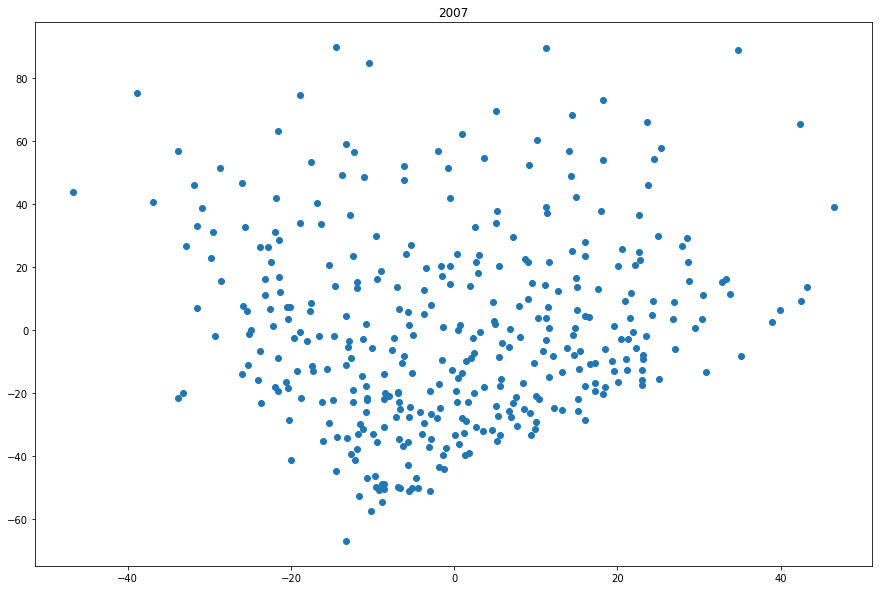

In [15]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
mds_out = model.fit_transform(arr)
dates = new_df['Date'].dt.date.values
x = mds_out[:,0]
y = mds_out[:,1]

plt.figure(figsize=(15,10))
plt.scatter(x,y)
# for i, txt in enumerate(dates):
#     try:
#         plt.annotate(txt, (x[i]+0.3, y[i]+0.3))
#     except:
#         continue
plt.title("2007")
plt.show()

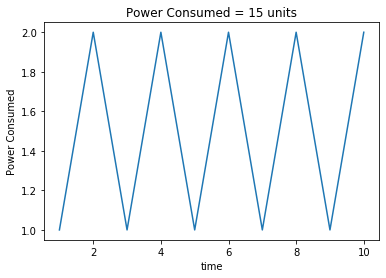

In [16]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,1,2,1,2,1,2,1,2]

plt.plot(x,y)
plt.ylabel("Power Consumed")
plt.xlabel("time")
plt.title("Power Consumed = 15 units")
plt.show()

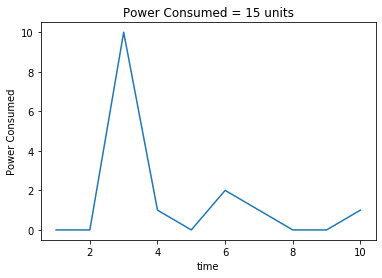

In [17]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [0,0,10,1,0,2,1,0,0,1]
plt.ylabel("Power Consumed")
plt.xlabel("time")
plt.title("Power Consumed = 15 units")
plt.plot(x,y)
plt.show()